In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
# from small_script.myFunctions import *



%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [3]:
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.Polypeptide import PPBuilder
from Bio.PDB.Polypeptide import three_to_one
def get_inside_or_not_table(pdb_file):
    parser = PDBParser(PERMISSIVE=1,QUIET=True)
    try:
        structure = parser.get_structure('X', pdb_file)
    except:
        return [0]
    inside_or_not_table = []
    for res in structure.get_residues():
        if res.get_id()[0] != " ":
            continue# skip
        try:
            res["CA"].get_vector()
        except:
            print(pdb_file, res.get_id())
            return [0]
        inside_or_not_table.append(int(abs(res["CA"].get_vector()[-1]) < 15))
    return inside_or_not_table
def extractTransmembrane(toLocation, location):
    x = PDBParser().get_structure("x", location)
    class Transmembrane(Select):
        def accept_residue(self, residue):
            if abs(residue["CA"].get_vector()[-1]) < 15:
                return 1
            else:
                return 0

    io = PDBIO()
    io.set_structure(x)
    io.save(toLocation, Transmembrane())

def getSeqFromPDB(location, considerGap=True):
    x = PDBParser().get_structure("x", location)
    seq = ""
    resseqs = []
    preResId = 0
    for res in x.get_residues():
        resId = res.get_id()[1]
        if considerGap and resId != preResId + 1:
            seq += " "
            resseqs.append(-1)
        seq += three_to_one(res.get_resname())
        resseqs.append(res.get_id()[1])
        preResId = resId
    return seq,resseqs

In [14]:
info = pd.read_csv("/Users/weilu/Research/database/membrane_contact_dtabase/for_iter0_training_complete_jun06.csv", index_col=0)


In [25]:
a = info.query("InMembraneRatio > 0.2 and InMembraneRatio < 0.8 and Length < 2000").reset_index()
a.to_csv("/Users/weilu/Research/database/relative_k/chosen_jun19.csv")



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1acbe940>]],
      dtype=object)

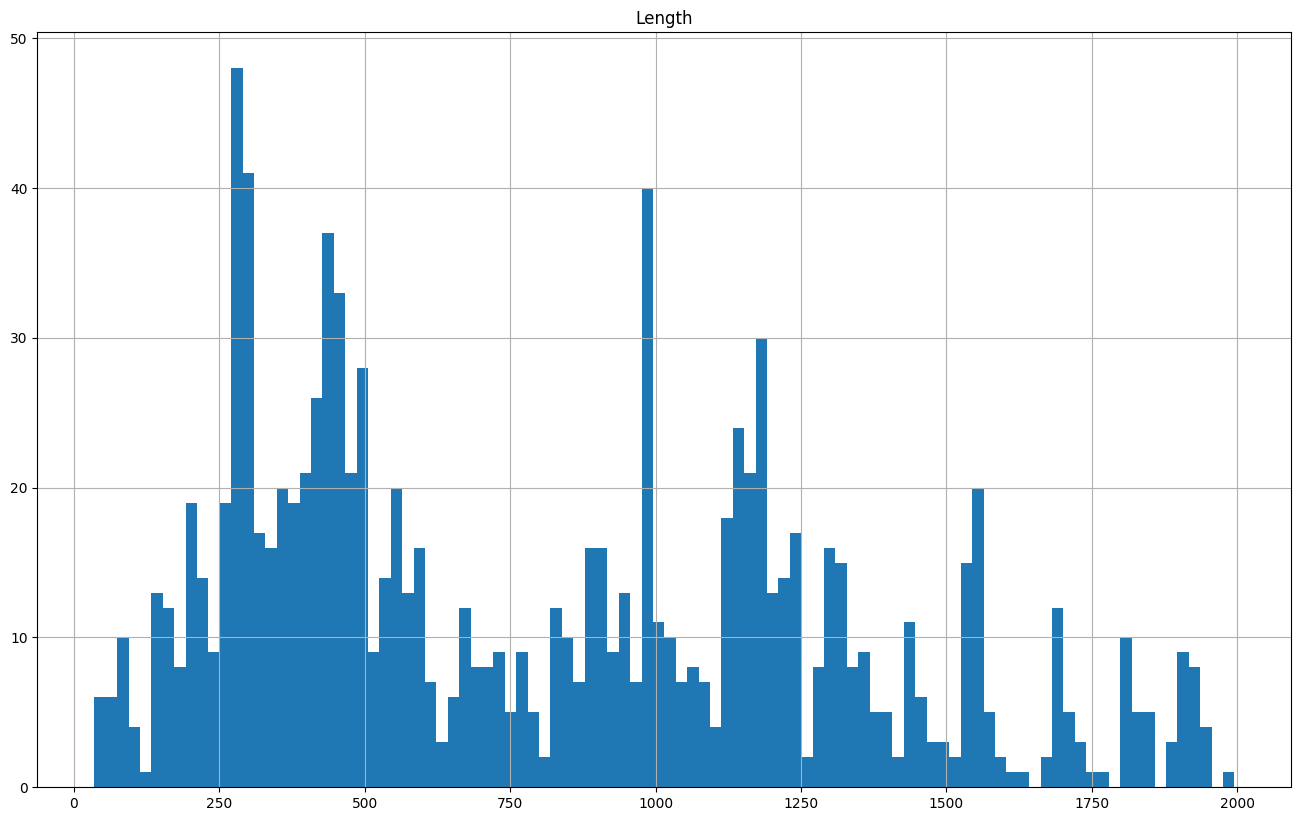

In [22]:
a.hist("Length", bins=100)

In [23]:
a.shape

(1116, 3)

In [18]:
a.columns

Index(['Protein', 'Length', 'InMembraneRatio'], dtype='object')

# I will compute the z score for those 1116 structures.

In [31]:
chosen = pd.read_csv("/Users/weilu/Research/database/relative_k/chosen_jun19.csv", index_col=0)
parser = PDBParser(PERMISSIVE=1,QUIET=True)

In [33]:
pre = "/Users/weilu/Research/database/hybrid_contact_database/"
toPre = "/Users/weilu/Research/server/jun_2019/relative_k/database/"
pdb_list = chosen.Protein.tolist()
for pdb in pdb_list:
    fromLocation = f'{pre}/cleaned/{pdb}.pdb'
    toLocation = f"{toPre}/dompdb/"
    os.system(f"cp {fromLocation} {toLocation}")
#     seq = ""
#     for res in structure.get_residues():
#         resName = three_to_one(res.resname)
#         seq += resName
#     with open(f"{toPre}/S20_seq/{pdb}.seq", "w") as out:
#         out.write(seq+"\n")


In [37]:
for pdb in pdb_list:
    fromLocation = f'{pre}/cleaned/{pdb}.pdb'
#     toLocation = f"{toPre}/dompdb/"
#     os.system(f"cp {fromLocation} {toLocation}")
    try:
        structure = parser.get_structure(pdb, fromLocation)
    except:
        print(fromLocation)
        print("cannot get ", pdb)
        continue
    seq = ""
    for res in structure.get_residues():
        resName = three_to_one(res.resname)
        seq += resName
    with open(f"{toPre}/S20_seq/{pdb}.seq", "w") as out:
        out.write(seq+"\n")


In [38]:
np.random.shuffle(pdb_list)
with open(f"{toPre}..//optimization/protein_list", "w") as out:
    for pdb in pdb_list:
        out.write(pdb+"\n")

In [88]:
with open("/Users/weilu/Research/server/jun_2019/relative_k/optimization/small_protein_list") as f:
    names = f.readlines()

In [171]:
with open("/Users/weilu/Research/server/jun_2019/relative_k/optimization/protein_list") as f:
    names = f.readlines()

In [172]:
names = [i.strip() for i in names]

In [173]:
name = names[4].strip()
name

'4eiy'

In [174]:
len(names)

1116

In [179]:
pre = "/Users/weilu/Research/server/jun_2019/relative_k/phis"
name = names[0]
cutoff = 1.0
decoy = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_decoys_shifted_4.5_6.5_5.0_10")
native = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_native_4.5_6.5_5.0_10")
decoyQ = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_decoysQ_shifted_4.5_6.5_5.0_10")
value_list, value_sum_list = get_value_array(decoy=decoy, decoyQ=decoyQ, native=native, cutoff=cutoff)
for i, name in enumerate(names[1:]):
    if i % 100 == 0:
        print(i)
    decoy = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_decoys_shifted_4.5_6.5_5.0_10")
    native = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_native_4.5_6.5_5.0_10")
    decoyQ = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_decoysQ_shifted_4.5_6.5_5.0_10")
    one_value_list, one_value_sum_list = get_value_array(decoy=decoy, decoyQ=decoyQ, native=native, cutoff=cutoff)
    value_list += one_value_list
    value_sum_list += one_value_sum_list

value_list /= len(names)
one_value_sum_list /= len(names)


0
100
200
300
400
500
600
700
800
900
1000
1100


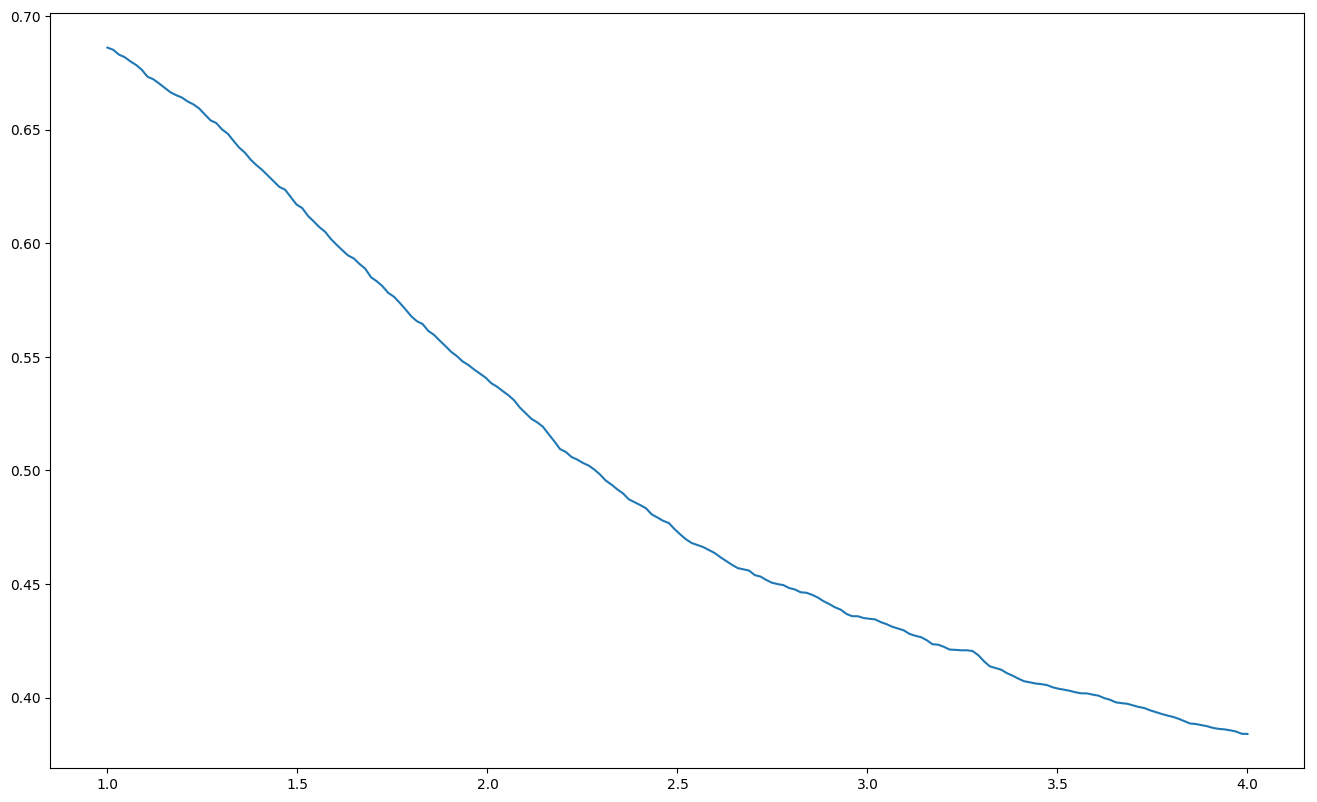

In [180]:
plt.plot(gamma_list, value_list)
# plt.plot(gamma_list, value_sum_list)

In [175]:
pre = "/Users/weilu/Research/server/jun_2019/relative_k/phis"
name = names[0]
cutoff = 0.9
decoy = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_decoys_shifted_4.5_6.5_5.0_10")
native = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_native_4.5_6.5_5.0_10")
decoyQ = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_decoysQ_shifted_4.5_6.5_5.0_10")
value_list, value_sum_list = get_value_array(decoy=decoy, decoyQ=decoyQ, native=native, cutoff=cutoff)
for i, name in enumerate(names[1:]):
    if i % 100 == 0:
        print(i)
    decoy = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_decoys_shifted_4.5_6.5_5.0_10")
    native = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_native_4.5_6.5_5.0_10")
    decoyQ = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_decoysQ_shifted_4.5_6.5_5.0_10")
    one_value_list, one_value_sum_list = get_value_array(decoy=decoy, decoyQ=decoyQ, native=native, cutoff=cutoff)
    value_list += one_value_list
    value_sum_list += one_value_sum_list

value_list /= len(names)
one_value_sum_list /= len(names)


0
100
200
300
400
500
600
700
800
900
1000
1100


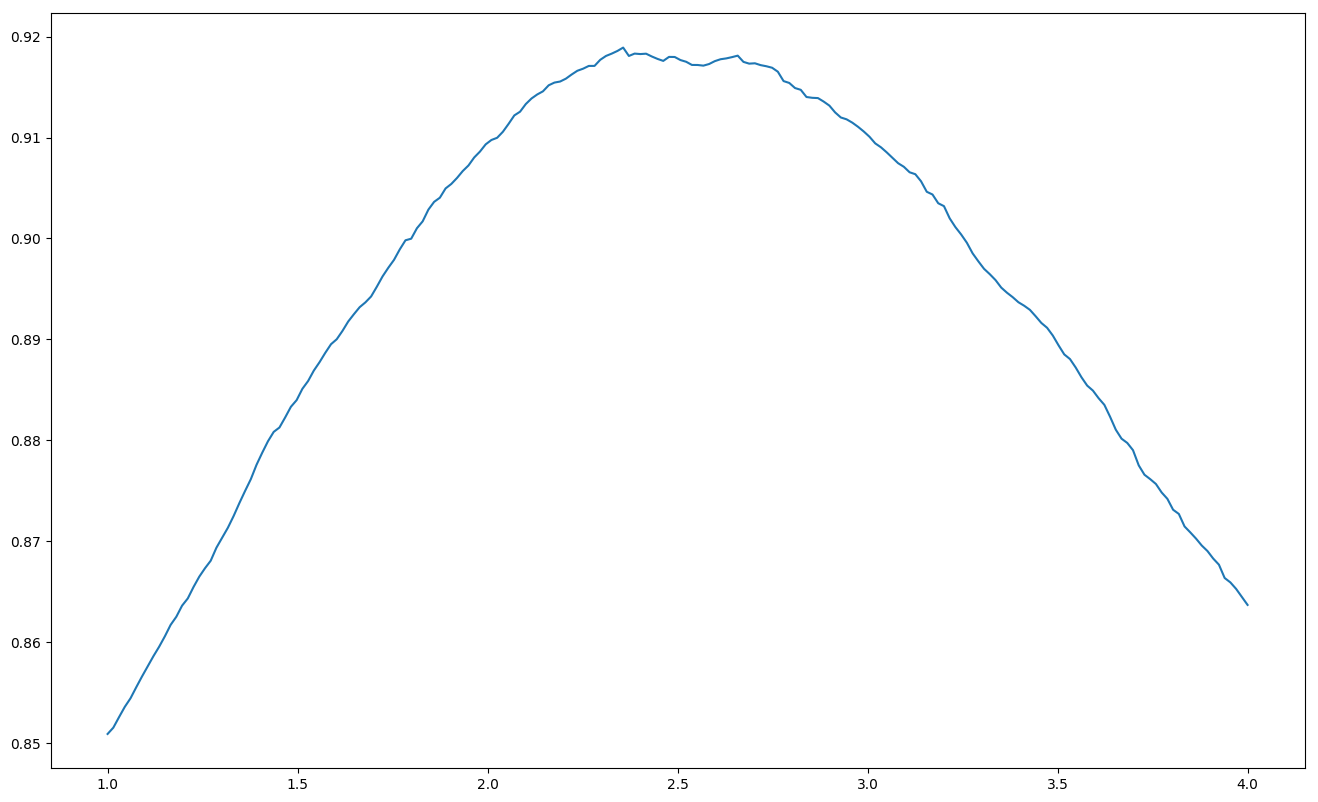

In [178]:
plt.plot(gamma_list, value_list)
# plt.plot(gamma_list, value_sum_list)

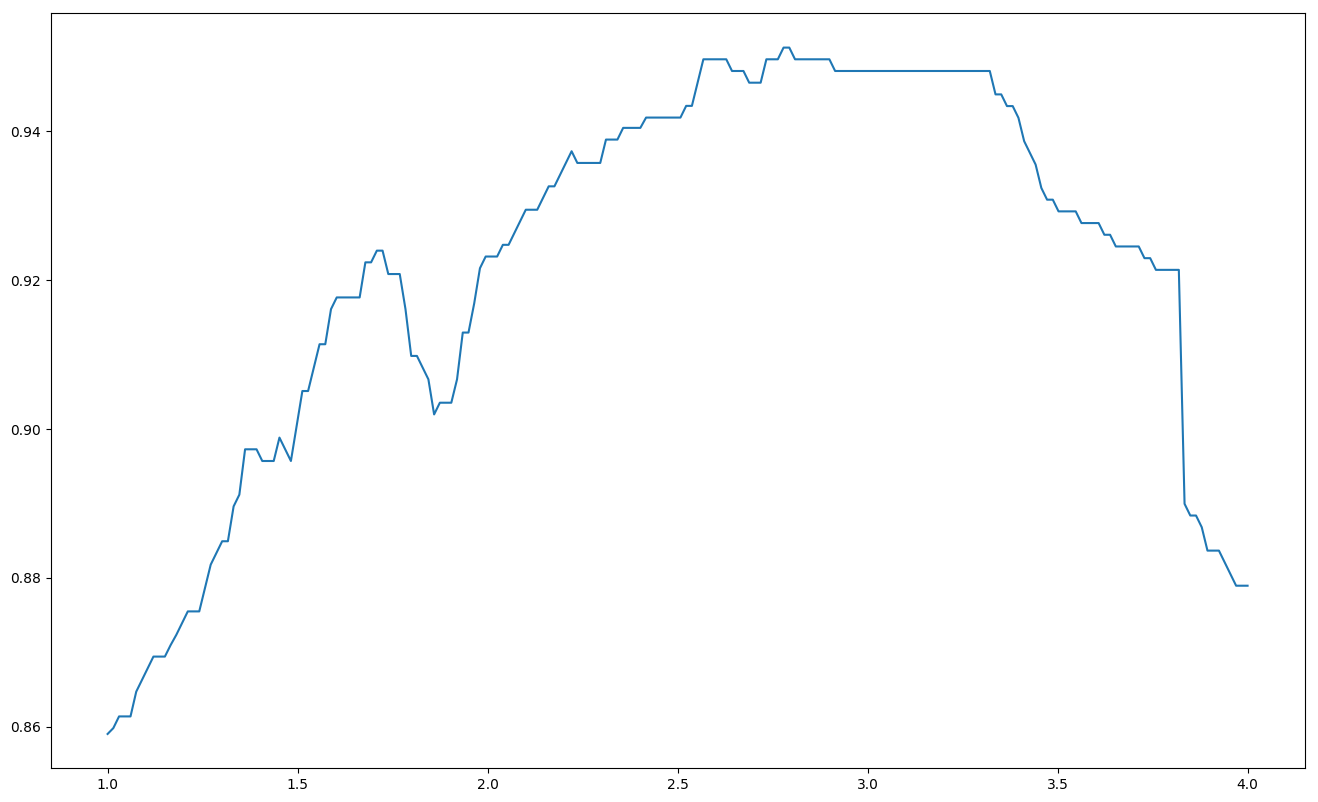

In [170]:
plt.plot(gamma_list, value_list)
# plt.plot(gamma_list, value_sum_list)

In [ ]:
pre = "/Users/weilu/Research/server/jun_2019/relative_k/phis"
decoy = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_decoys_shifted_4.5_6.5_5.0_10")
native = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_native_4.5_6.5_5.0_10")
decoyQ = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_decoysQ_shifted_4.5_6.5_5.0_10")



In [163]:
pre = "/Users/weilu/Research/server/jun_2019/relative_k/phis"
name = names[0]
decoy = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_decoys_shifted_4.5_6.5_5.0_10")
native = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_native_4.5_6.5_5.0_10")
decoyQ = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_decoysQ_shifted_4.5_6.5_5.0_10")
value_list, value_sum_list = get_value_array(decoy=decoy, decoyQ=decoyQ, native=native, cutoff=0.9)
for name in names[1:]:
    decoy = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_decoys_shifted_4.5_6.5_5.0_10")
    native = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_native_4.5_6.5_5.0_10")
    decoyQ = np.loadtxt(f"{pre}/phi_relative_k_well_{name}_decoysQ_shifted_4.5_6.5_5.0_10")
    one_value_list, one_value_sum_list = get_value_array(decoy=decoy, decoyQ=decoyQ, native=native, cutoff=0.9)
    value_list += one_value_list
    value_sum_list += one_value_sum_list

value_list /= len(names)
one_value_sum_list /= len(names)


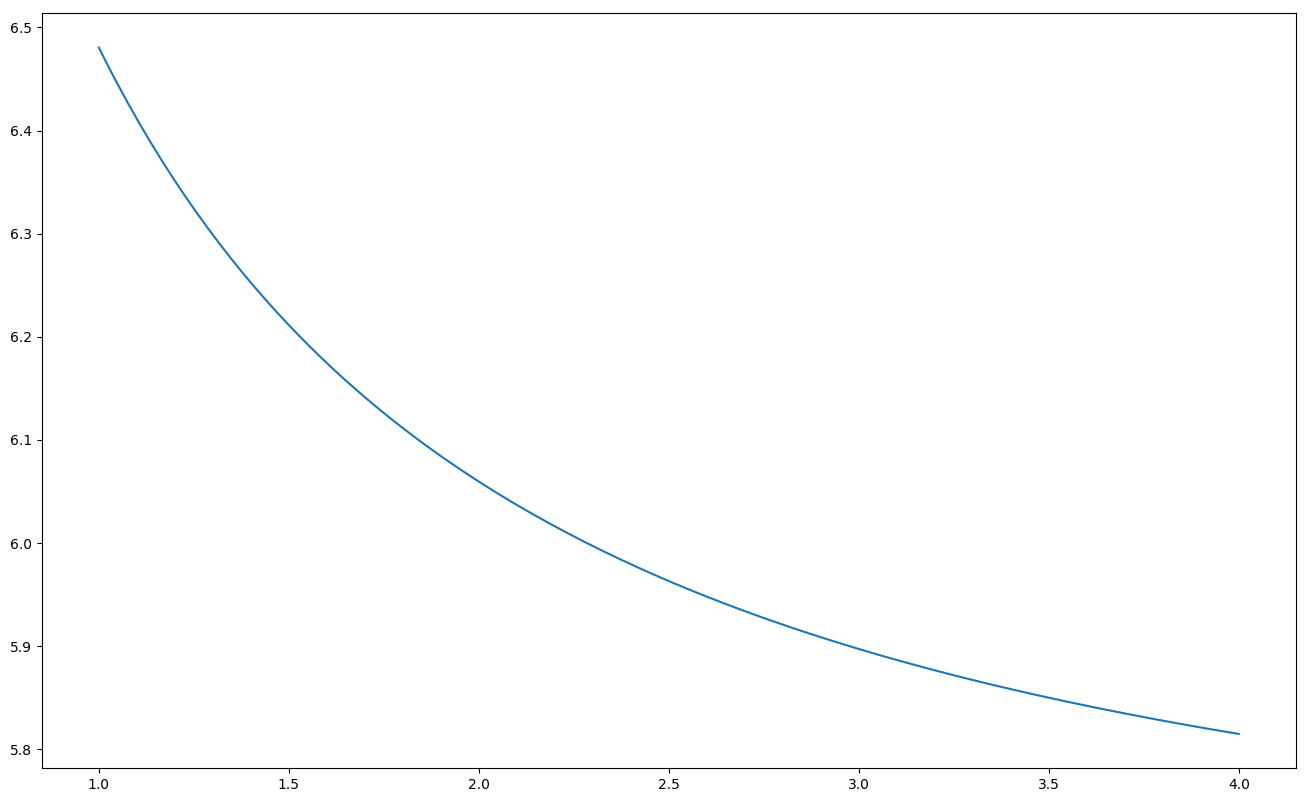

In [166]:
plt.plot(gamma_list, value_sum_list)

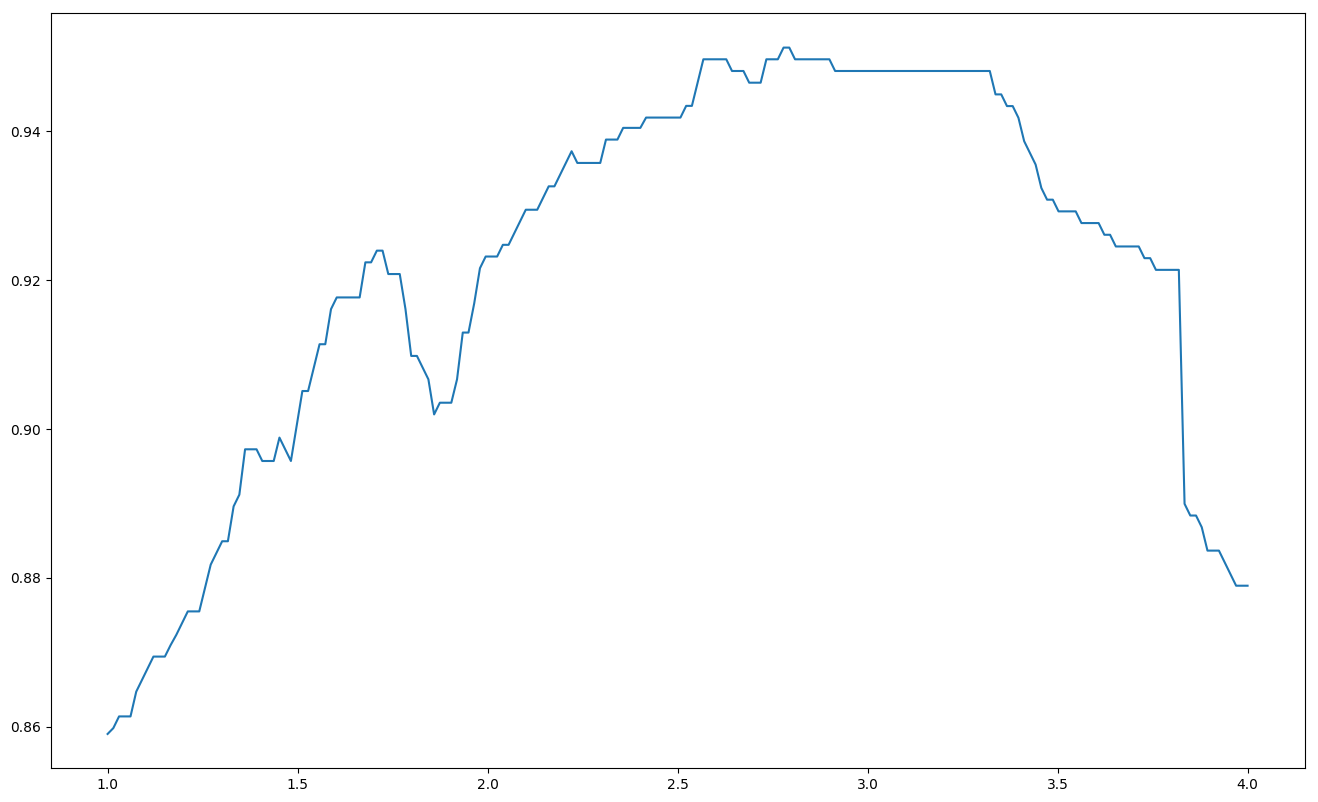

In [165]:
plt.plot(gamma_list, value_list)
# plt.plot(gamma_list, value_sum_list)

In [131]:
def get_value(gamma, decoy, decoyQ, native, cutoff=0.95):
    # gamma = 1
    limit =60
    energy = [a[0]+a[1]*gamma for a in decoy]
    z_m =  list(np.arange(1, limit, 1)) + list(np.arange(-limit, -1, 1))
    d = pd.DataFrame([z_m, energy, list(decoyQ)]).T
    d.columns = ["z_m", "energy", "Q"]
    d = d.sort_values("z_m").reset_index()
    native_energy =native[0] + native[1]*gamma
    d["z"] = native_energy/d["energy"]
    # dz = d["z"].tolist()
    value = ( ((d["z"] > cutoff)) * (1-d["Q"]) ).sum()/(1-d["Q"]).sum()
    value_sum =  ((d["z"]) * (1-d["Q"]) ).sum()/(1-d["Q"]).sum()
    return value, value_sum

In [162]:
def get_value_array(**kwargs):
    gamma_list = np.linspace(1,4, num=200)
    value_list = []
    value_sum_list = []
    for gamma in gamma_list:
        value, value_sum = get_value(gamma, **kwargs)
        # print(gamma, value)
        value_list.append(value)
        value_sum_list.append(value_sum)
    return np.array(value_list), np.array(value_sum_list)

In [150]:
value_list, value_sum_list = get_value_array(gamma=gamma, decoy=decoy, decoyQ=decoyQ, native=native, cutoff=0.9)

In [132]:
gamma_list = np.linspace(1,4, num=200)
value_list = []
value_sum_list = []
for gamma in gamma_list:
    value, value_sum = get_value(gamma, decoy, decoyQ, native, cutoff=0.9)
    # print(gamma, value)
    value_list.append(value)
    value_sum_list.append(value_sum)

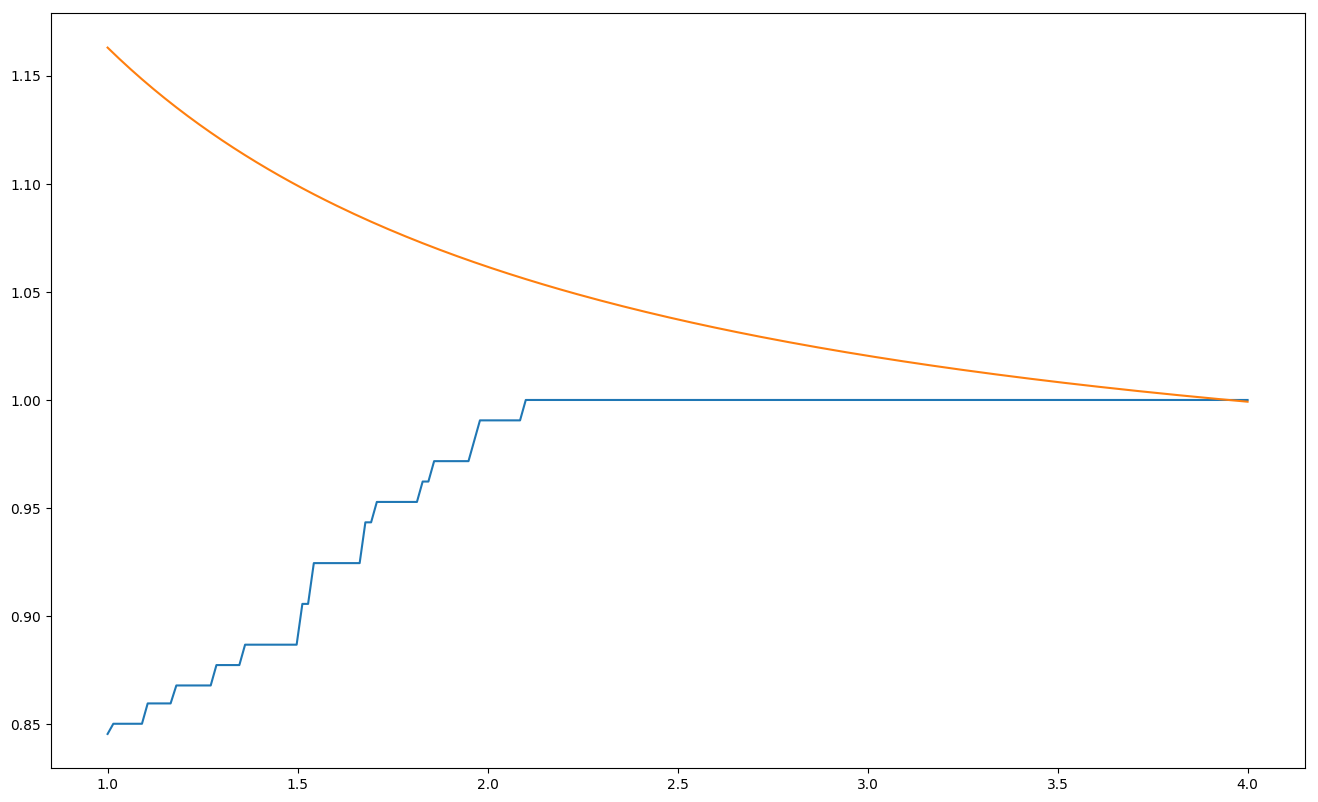

In [133]:
plt.plot(gamma_list, value_list)
plt.plot(gamma_list, value_sum_list)

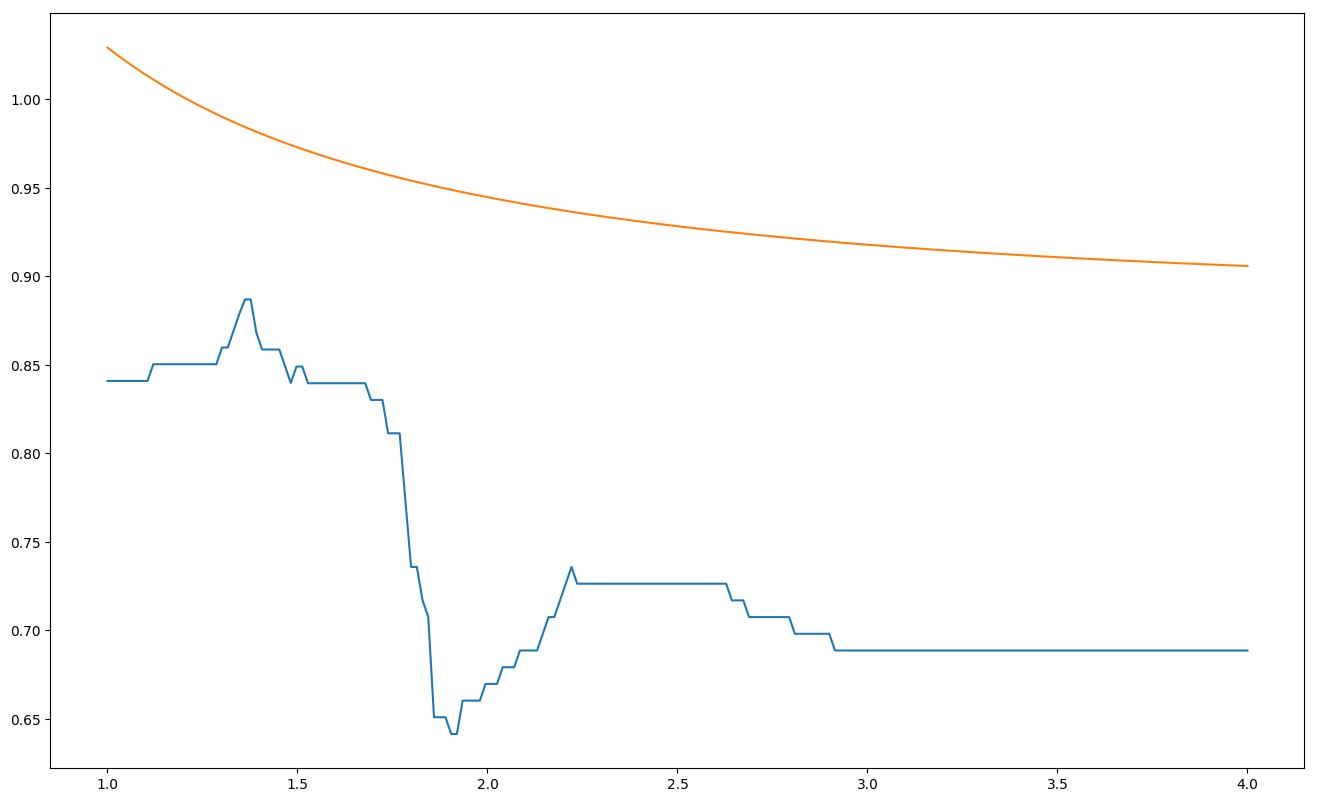

In [128]:
plt.plot(gamma_list, value_list)
plt.plot(gamma_list, value_sum_list)

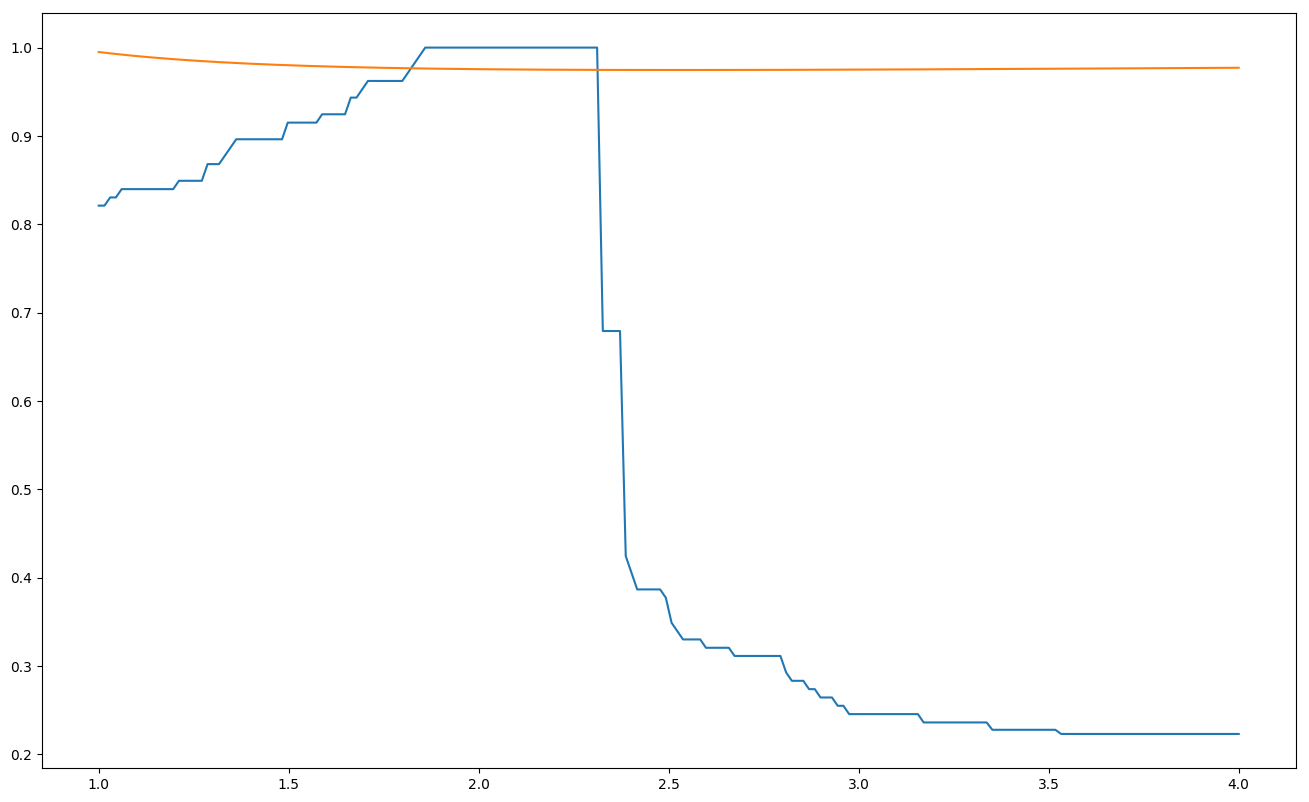

In [82]:
plt.plot(gamma_list, value_list)
plt.plot(gamma_list, value_sum_list)

In [83]:
get_value(2, decoy, decoyQ, native)

(1.0, 0.9755688843602008)

In [117]:
native_energy

221.33339999999998

In [126]:
native_energy/ (2.5 + 128*2 )

0.8562220502901353

0.48108864356347847


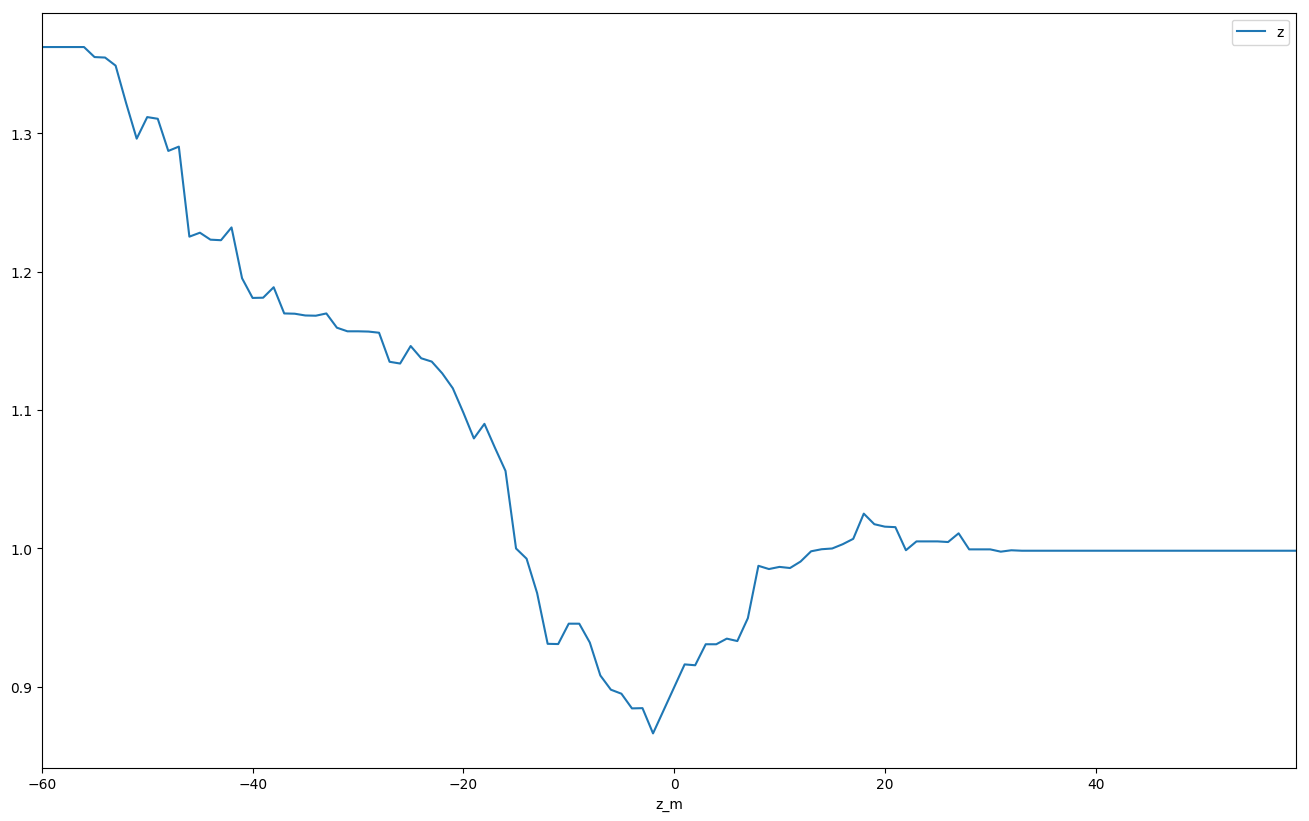

In [144]:
gamma = 1.8
limit =60
cutoff = 1.0
energy = [a[0]+a[1]*gamma for a in decoy]
z_m =  list(np.arange(1, limit, 1)) + list(np.arange(-limit, -1, 1))
d = pd.DataFrame([z_m, energy, list(decoyQ)]).T
d.columns = ["z_m", "energy", "Q"]
d = d.sort_values("z_m")
d = d.reset_index()
native_energy =native[0] + native[1]*gamma
d["z"] = native_energy/d["energy"]

value = ( ((d["z"] > cutoff)) * (1-d["Q"]) ).sum()/(1-d["Q"]).sum()
print(value)
d.plot("z_m", "z")

0.41069983150911604


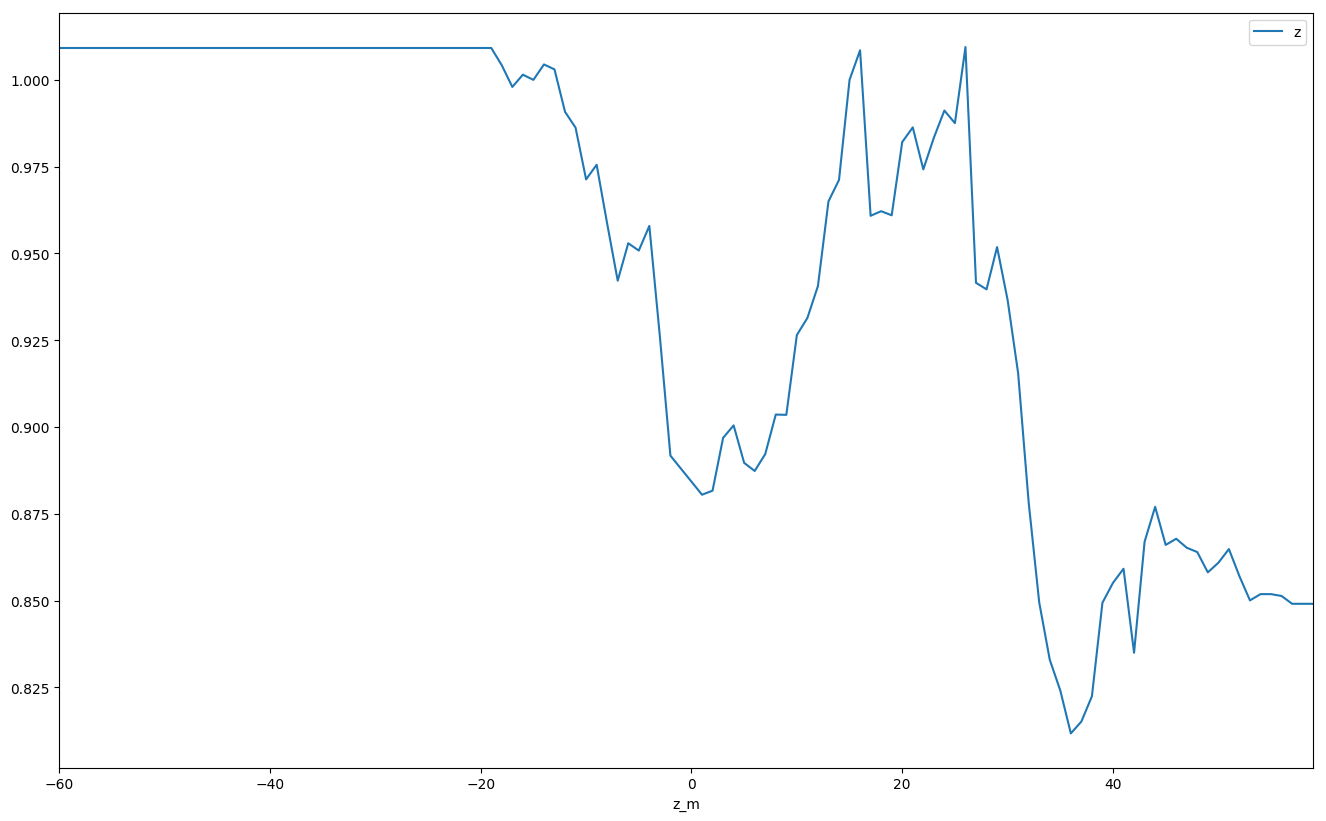

In [111]:
gamma = 2
limit =60
cutoff = 1.0
energy = [a[0]+a[1]*gamma for a in decoy]
z_m =  list(np.arange(1, limit, 1)) + list(np.arange(-limit, -1, 1))
d = pd.DataFrame([z_m, energy, list(decoyQ)]).T
d.columns = ["z_m", "energy", "Q"]
d = d.sort_values("z_m")
d = d.reset_index()
native_energy =native[0] + native[1]*gamma
d["z"] = native_energy/d["energy"]

value = ( ((d["z"] > cutoff)) * (1-d["Q"]) ).sum()/(1-d["Q"]).sum()
print(value)
d.plot("z_m", "z")

In [105]:
d

,index,z_m,energy,Q,z
0,59,-60.0,162.9544,0.0,1.014328
1,60,-59.0,162.9544,0.0,1.014328
2,61,-58.0,162.9544,0.0,1.014328
3,62,-57.0,162.9544,0.0,1.014328
4,63,-56.0,162.9544,0.0,1.014328
5,64,-55.0,162.9544,0.0,1.014328
6,65,-54.0,162.9544,0.0,1.014328
7,66,-53.0,162.9544,0.0,1.014328
8,67,-52.0,162.9544,0.0,1.014328
9,68,-51.0,162.9544,0.0,1.014328


0.1512625495519803


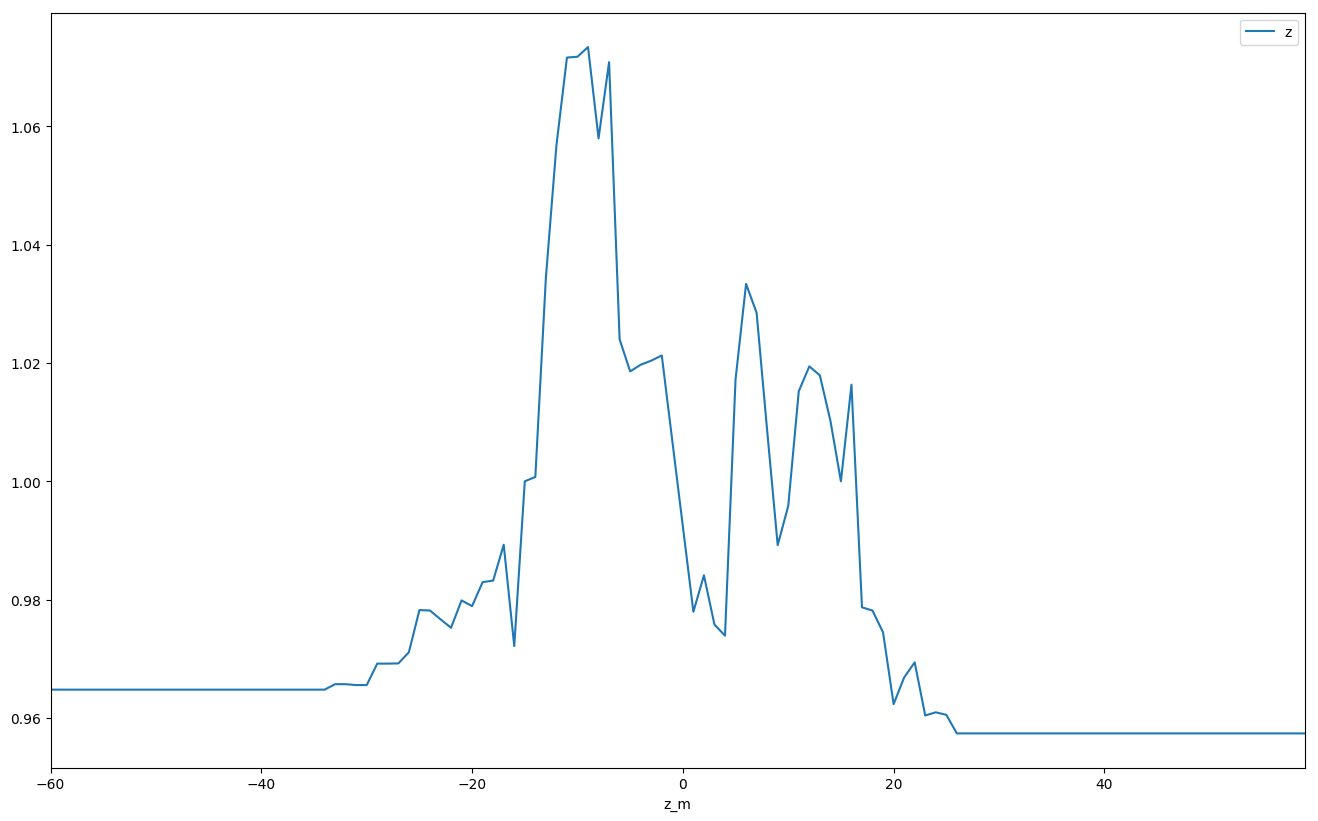

In [84]:
gamma = 2
limit =60
cutoff = 1.0
energy = [a[0]+a[1]*gamma for a in decoy]
z_m =  list(np.arange(1, limit, 1)) + list(np.arange(-limit, -1, 1))
d = pd.DataFrame([z_m, energy, list(decoyQ)]).T
d.columns = ["z_m", "energy", "Q"]
d = d.sort_values("z_m")
native_energy =native[0] + native[1]*gamma
d["z"] = native_energy/d["energy"]

value = ( ((d["z"] > cutoff)) * (1-d["Q"]) ).sum()/(1-d["Q"]).sum()
print(value)
d.plot("z_m", "z")

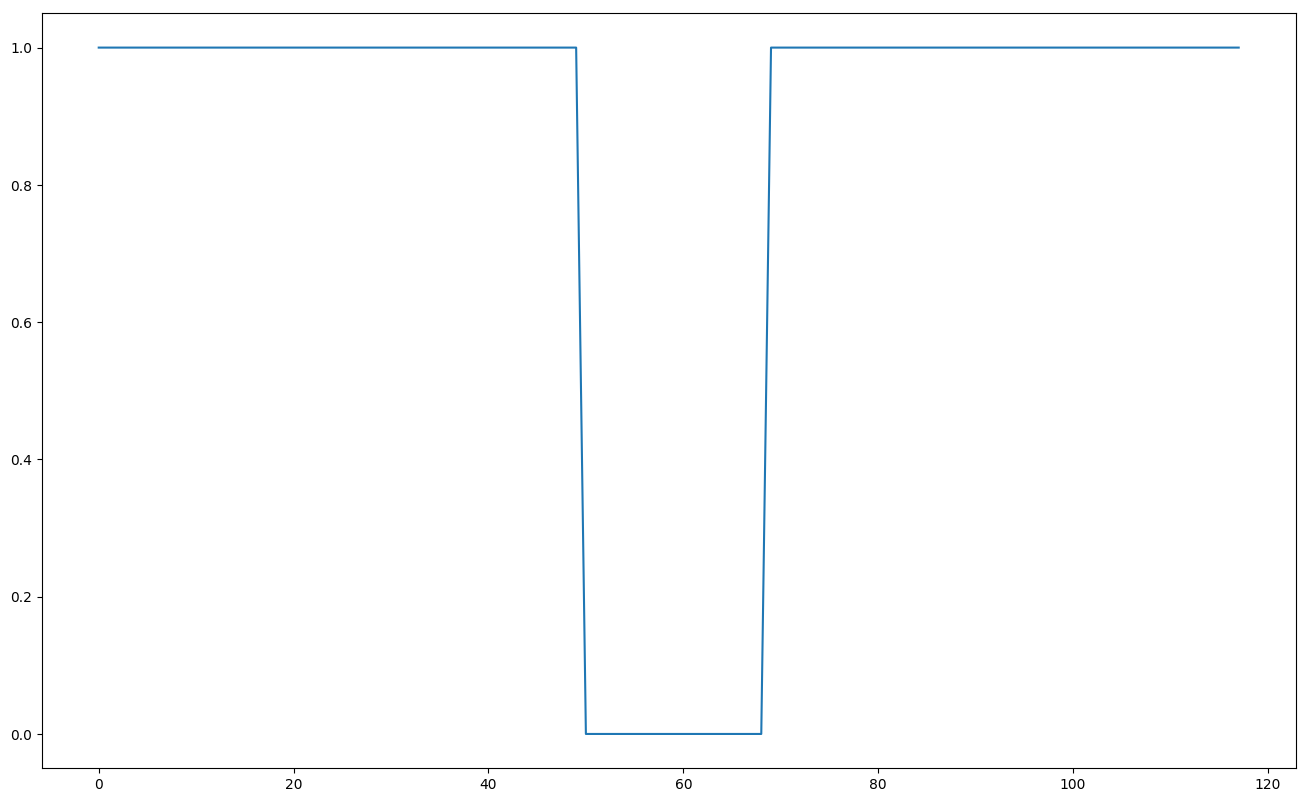

In [47]:
plt.plot( ((d["z"].reset_index()["z"] > 0.95) ) )

In [227]:
d

,z_m,energy,z
59,-60.0,687.9749,0.964768
60,-59.0,687.9749,0.964768
61,-58.0,687.9749,0.964768
62,-57.0,687.9749,0.964768
63,-56.0,687.9749,0.964768
64,-55.0,687.9749,0.964768
65,-54.0,687.9749,0.964768
66,-53.0,687.9749,0.964768
67,-52.0,687.9749,0.964768
68,-51.0,687.9749,0.964768


In [192]:
decoys_all = np.loadtxt("/Users/weilu/Research/server/jun_2019/relative_k/phis/protein_list_phi_relative_k_well4.5_6.5_5.0_10_phi_decoy_all_summary.txt")
decoy_Q = np.loadtxt("/Users/weilu/Research/server/jun_2019/relative_k/phis/phi_relative_k_well_5j4i_decoysQ_shifted_4.5_6.5_5.0_10")


In [197]:
normalized = decoys_all.sum(axis=0) / (1-decoy_Q).sum()

In [198]:
normalized

array([ 89.09506801, 295.90188123])

In [183]:
(1-decoy_Q).sum()

105.9998

In [174]:
decoys_all.mean(axis=0)

array([ 80.03440161, 265.80966297])

In [ ]:
pre = "/Users/weilu/Research/server/jun_2019/relative_k/phis"
decoy_high = np.loadtxt(f"{pre}/{name}_phis_high")
decoy_low = np.loadtxt(f"{pre}/{name}_phis_low")



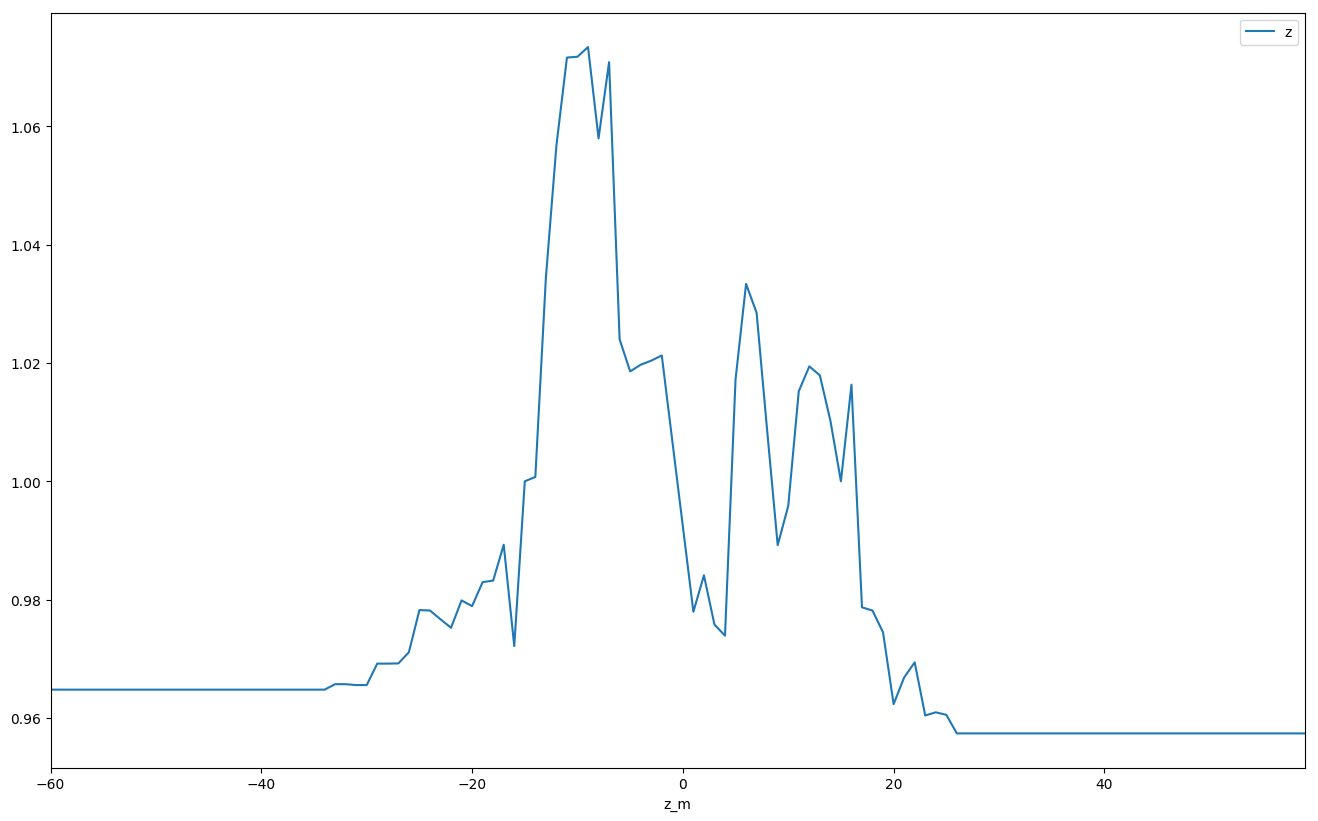

In [220]:
gamma = 2
energy = [a[0]+a[1]*gamma for a in decoy_low]
z_m =  list(z_m_high) + list(z_m_low)
d = pd.DataFrame([z_m, energy]).T
d.columns = ["z_m", "energy"]
d = d.sort_values("z_m")
native_energy = d.query("abs(z_m) == 15").iloc[0][1]
d["z"] = native_energy/d["energy"]
d.plot("z_m", "z")

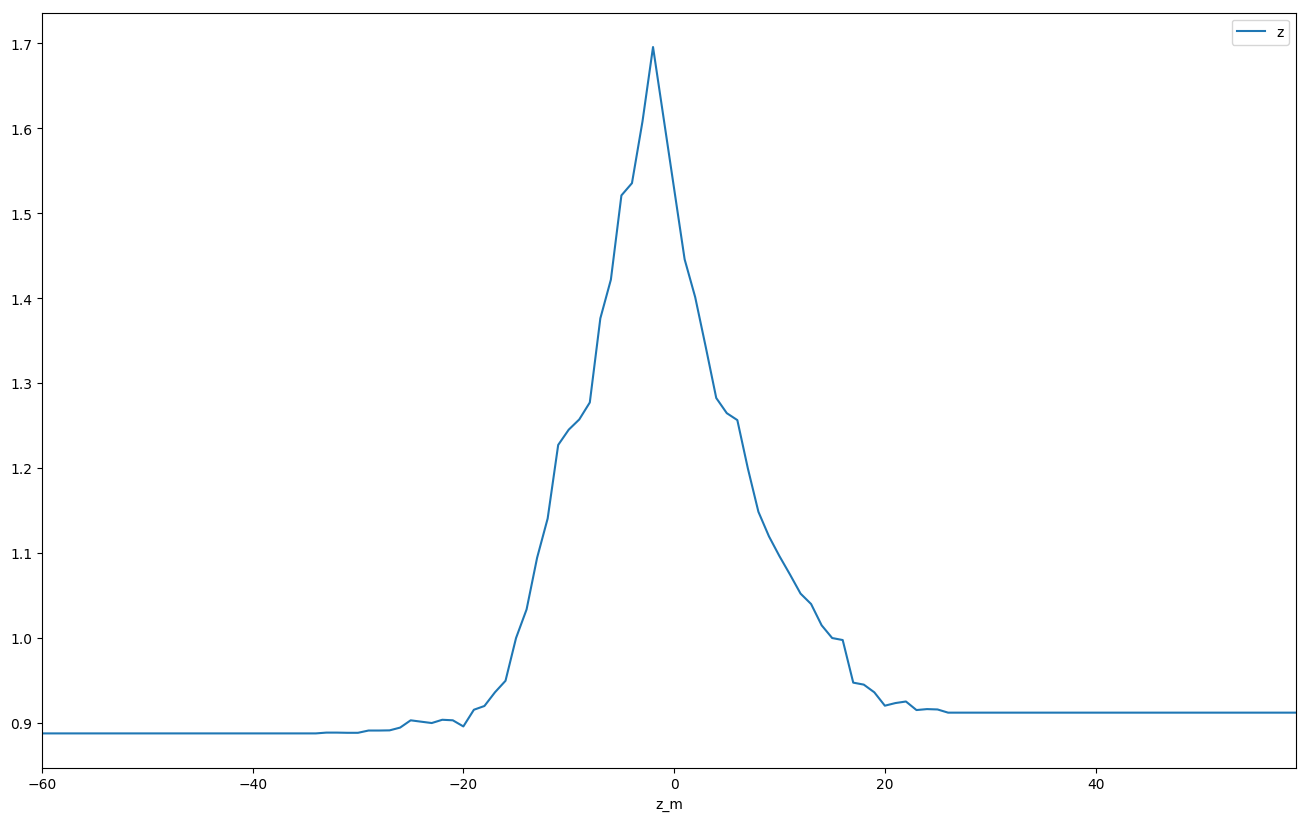

In [216]:
gamma = 10
energy = [a[0]+a[1]*gamma for a in decoy_low]
z_m =  list(z_m_high) + list(z_m_low)
d = pd.DataFrame([z_m, energy]).T
d.columns = ["z_m", "energy"]
d = d.sort_values("z_m")
native_energy = d.query("abs(z_m) == 15").iloc[0][1]
d["z"] = native_energy/d["energy"]
d.plot("z_m", "z")

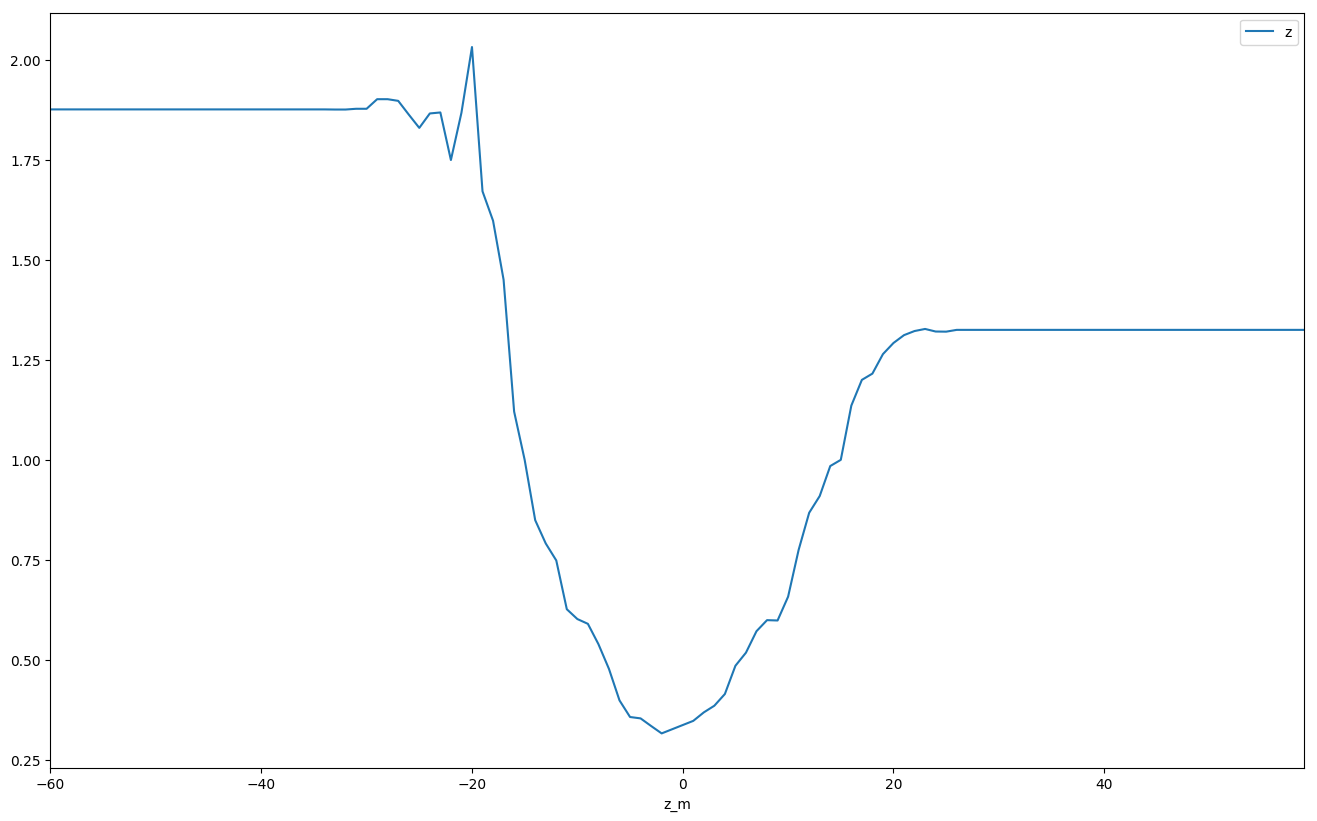

In [212]:
gamma = 0.1
energy = [a[0]+a[1]*gamma for a in decoy_low]
z_m =  list(z_m_high) + list(z_m_low)
d = pd.DataFrame([z_m, energy]).T
d.columns = ["z_m", "energy"]
d = d.sort_values("z_m")
native_energy = d.query("abs(z_m) == 15").iloc[0][1]
d["z"] = native_energy/d["energy"]
d.plot("z_m", "z")

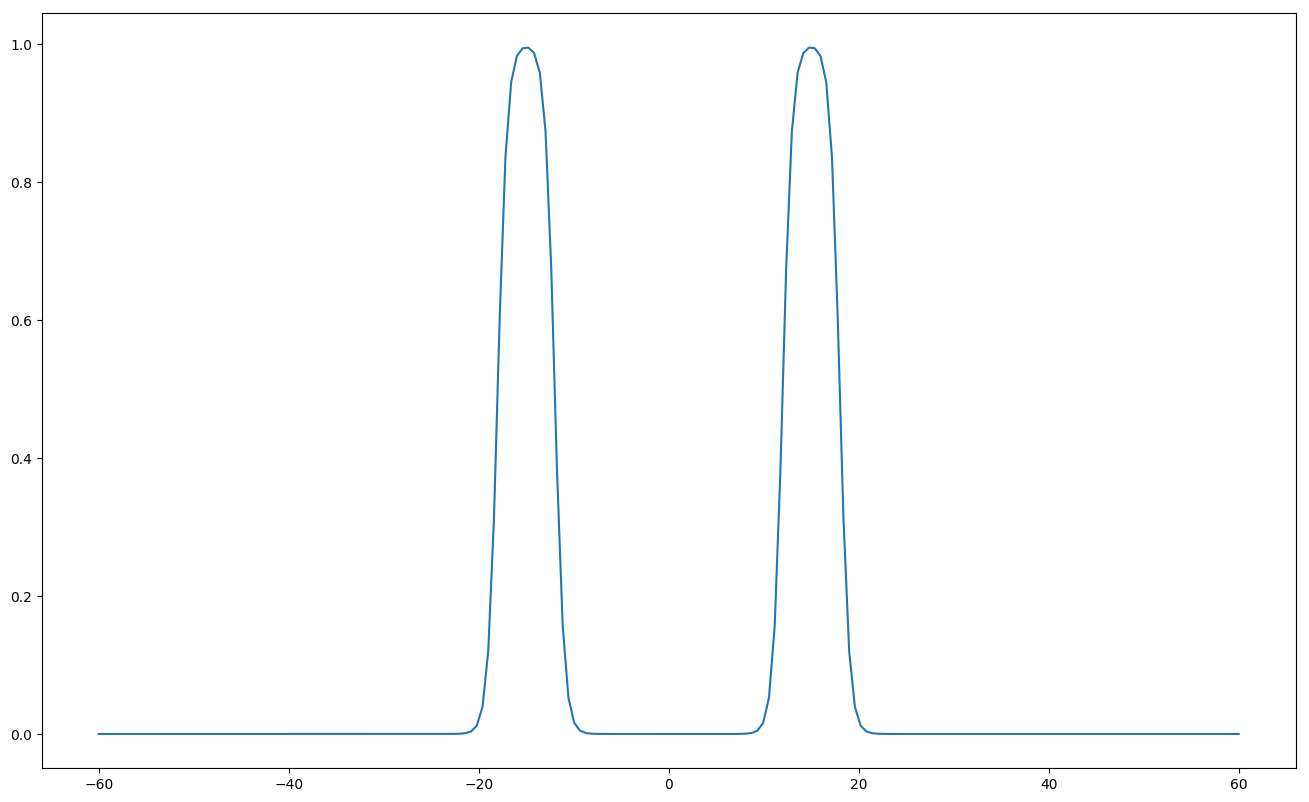

In [169]:
def interaction_well(r, r_min, r_max, kappa):
    return 0.5 * (np.tanh(kappa * (r - r_min)) * np.tanh(kappa * (r_max - r))) + 0.5
# r = np.linspace(10, 20, num=200)
r = np.linspace(-60,60, num=200)
y = interaction_well(r, 12, 18, 1) + interaction_well(r, -18, -12, 1)
plt.plot(r, y)

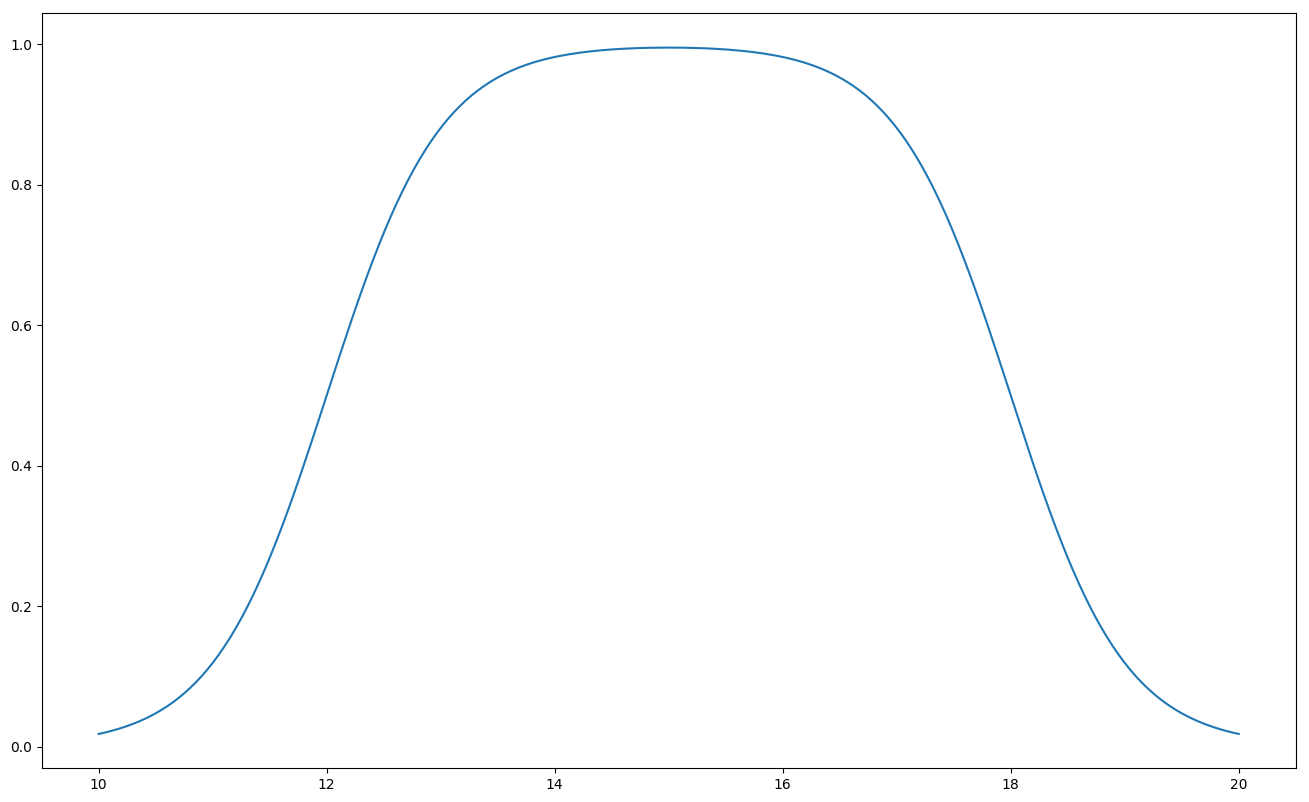

In [167]:
r = np.linspace(10, 20, num=200)
y = interaction_well(r, 12, 18, 1)
plt.plot(r, y)

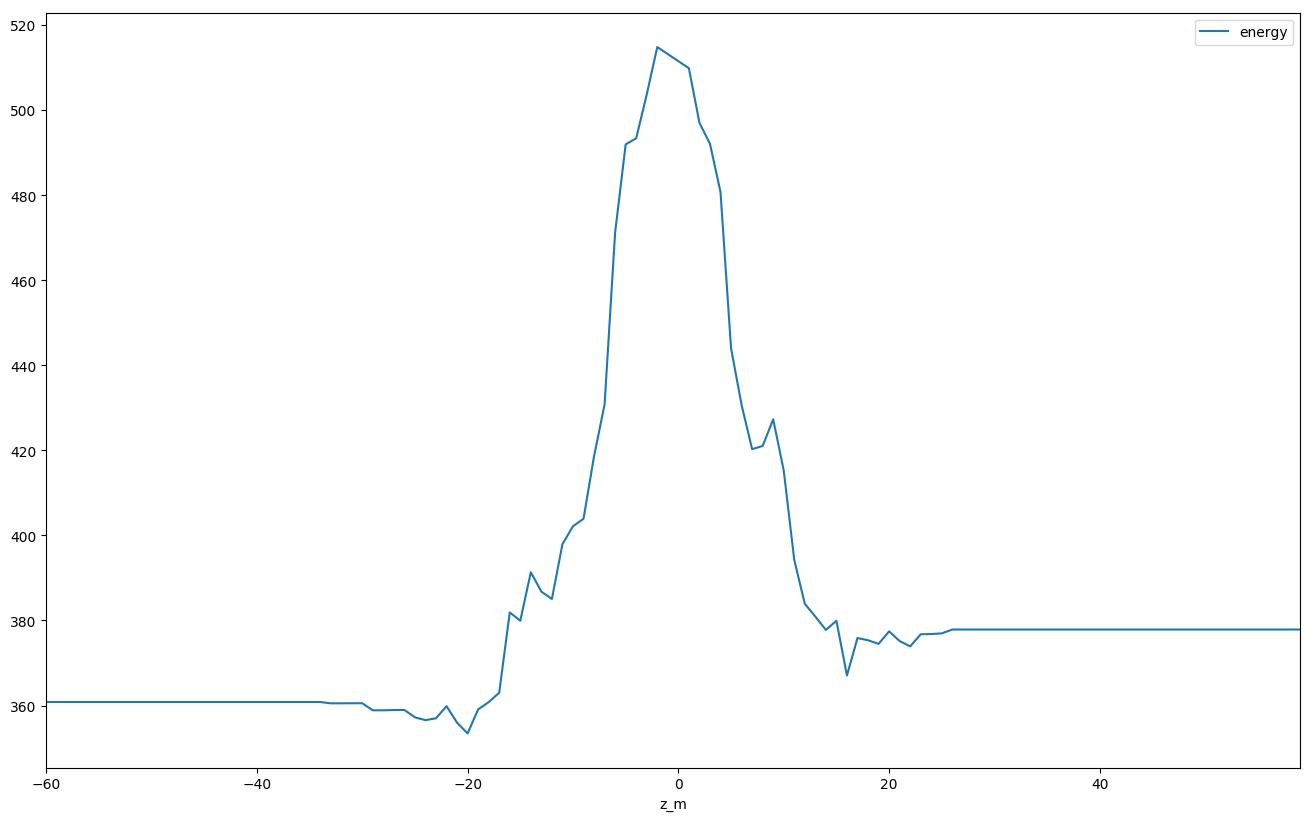

In [134]:
d.plot("z_m", "energy")

In [122]:
len(energy)

118

In [46]:
pre = "/Users/weilu/Research/server/jun_2019/relative_k/phis"
decoy = np.loadtxt(f"{pre}/phi_relative_k_well_5j4i_decoys_shifted_4.5_6.5_5.0_10")
native = np.loadtxt(f"{pre}/phi_relative_k_well_5j4i_native_4.5_6.5_5.0_10")
decoyQ = np.loadtxt(f"{pre}/phi_relative_k_well_5j4i_decoysQ_shifted_4.5_6.5_5.0_10")



In [54]:
def compute_energy(decoy, native, decoyQ, gamma):
    energy = [a[0]+a[1]*gamma for a in decoy]
    return np.array(energy)

In [70]:
gamma = 10
native_energy = native[0] + native[1]*gamma

In [71]:
decoy_energy = compute_energy(decoy, native, decoyQ, gamma)



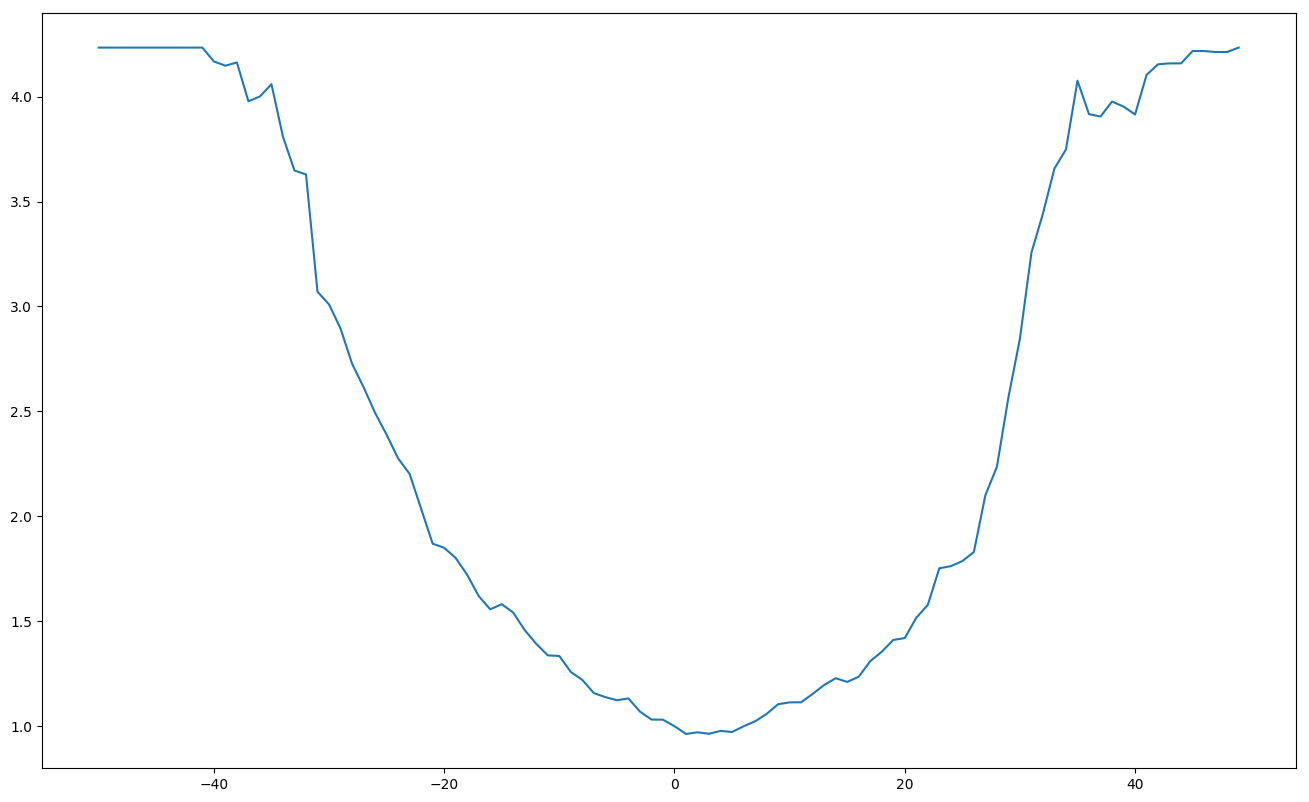

In [72]:
offset_all = np.arange(-50, 50, 1)
z = native_energy/decoy_energy
plt.plot(offset_all, z)

In [45]:
decoyQ

array([0.37528604, 0.37528604, 0.37528604, 0.37528604, 0.37528604,
       0.37528604, 0.37528604, 0.37528604, 0.37528604, 0.37299771,
       0.37185355, 0.36498856, 0.35697941, 0.34668192, 0.33524027,
       0.31922197, 0.29977117, 0.27803204, 0.25858124, 0.23913043,
       0.21395881, 0.23226545, 0.24828375, 0.27116705, 0.28832952,
       0.30778032, 0.33409611, 0.35469108, 0.37871854, 0.39702517,
       0.41533181, 0.43592677, 0.46224256, 0.48283753, 0.49885584,
       0.51716247, 0.5389016 , 0.55377574, 0.58009153, 0.60183066,
       0.62356979, 0.64988558, 0.67963387, 0.70823799, 0.74485126,
       0.78489703, 0.81922197, 0.86613272, 0.8993135 , 0.95308924,
       1.        , 0.95652174, 0.92334096, 0.87757437, 0.83524027,
       0.79290618, 0.74485126, 0.70709382, 0.66132723, 0.63501144,
       0.60526316, 0.5778032 , 0.54576659, 0.52402746, 0.50800915,
       0.48855835, 0.46338673, 0.44622426, 0.41990847, 0.40045767,
       0.3798627 , 0.3604119 , 0.33867277, 0.32036613, 0.29519

In [3]:
data = pd.read_csv("/Users/weilu/Research/database/membrane_training_set/proteins-2019-05-01.csv")
data.pdbid = data.pdbid.apply(lambda x: x[2:-1])

In [4]:
data.head()

,id,ordering,family_name_cache,species_name_cache,membrane_name_cache,name,description,comments,pdbid,resolution,...,species_id,family_id,superfamily_id,classtype_id,type_id,secondary_representations_count,structure_subunits_count,citations_count,created_at,updated_at
0,1,2024.0,OmpA family,Escherichia coli,Gram-neg. outer,"Outer membrane protein A (OMPA), disordered loops",NaN,OmpA is required for the action of colicins K ...,1qjp,1.65,...,9,34,26,2,1,3,1,2,2018-08-13 03:49:46 UTC,2018-09-21 18:14:03 UTC
1,2,2028.0,Enterobacterial Ail/Lom protein,Escherichia coli,Gram-neg. outer,Outer membrane protein X (OMPX),NaN,OmpX from Escherichia coli promotes adhesion t...,1qj8,1.90,...,9,355,26,2,1,7,1,1,2018-08-13 03:49:46 UTC,2018-09-21 18:14:03 UTC
2,3,2033.0,Opacity porins,Neisseria meningitidis,Gram-neg. outer,Outer membrane protein NspA,NaN,Pathogenic Neisseria spp. possess a repertoire...,1p4t,2.55,...,24,337,235,2,1,0,1,0,2018-08-13 03:49:46 UTC,2018-09-21 18:14:03 UTC
3,4,1740.0,Influenza virus matrix protein 2,Influenza virus,Viral,"M2 proton channel of Influenza A, closed state...",NaN,NaN,3lbw,1.65,...,51,263,185,11,1,3,4,0,2018-08-13 03:49:46 UTC,2018-10-02 17:42:36 UTC
4,5,2045.0,"OM protease omptin, OMPT",Yersinia pestis,Gram-neg. outer,Plasminogen activator PLA (coagulase/fibrinoly...,NaN,NaN,2x55,1.85,...,299,36,27,2,1,2,1,0,2018-08-13 03:49:46 UTC,2018-09-21 18:14:03 UTC


In [4]:
dd = pd.read_csv("/Users/weilu/Research/database/membrane_training_set/chosen.csv", index_col=0)
pdb_list = dd.pdbid.tolist()

In [5]:
filtered_list = []
for pdb in pdb_list:
    location = f"/Users/weilu/Research/database/relative_k/cleaned_pdbs/{pdb}.pdb"
    a = get_inside_or_not_table(location)
    ratio = sum(a)/len(a)
    if ratio < 0.2 or ratio > 0.8:
        print("not good", pdb, ratio)
    else:
        filtered_list.append(pdb)
        # print("good", pdb, ratio)
    # print(pdb, ratio)

not good 5lcb 0.0847457627118644
not good 6f0k 0.09178743961352658
not good 6adq 0.1346153846153846
not good 2oau 0.15748031496062992
not good 6cxh 0.1099476439790576
not good 1p49 0.09124087591240876
not good 4i0u 0.11527377521613832
not good 3bpp 0.0
not good 1kn9 0.004273504273504274
not good 4qo2 0.8186813186813187
not good 2hi7 0.0
not good 5svl 0.16516516516516516
not good 6el1 0.06267806267806268
not good 2ksf 0.8691588785046729
not good 2bhv 0.010582010582010581
not good 6idf 0.037481259370314844
not good 4jza 0.0
not good 5iji 0.18061674008810572
not good 1lv7 0.00398406374501992
not good 3b8n 0.0
not good 3pjv 0.0078125
not good 2lop 0.88
not good 2lom 0.8387096774193549
not good 2mmu 0.82
not good 5eke 0.1736111111111111
not good 5sy1 0.0
not good 5wud 0.8469387755102041
not good 5uph 0.0
not good 5v7v 0.021207177814029365
not good 6f2d 0.03940886699507389
not good 6c5w 0.14736842105263157
not good 6bug 0.0
not good 6mlu 0.0784313725490196
not good 6mct 0.8076923076923077


In [6]:
len(filtered_list)

86

In [7]:
pdb_list = filtered_list

In [8]:
pdb_list

['6c6l',
 '6aky',
 '1j4n',
 '5gjw',
 '1kpl',
 '4y7k',
 '6eu6',
 '5kxi',
 '4j05',
 '6ajg',
 '6fn4',
 '4nv6',
 '2zjs',
 '6gct',
 '2c3e',
 '5ksd',
 '4b4a',
 '4llh',
 '5y79',
 '5oc0',
 '3fi1',
 '4m58',
 '4a2n',
 '4uc1',
 '2q7r',
 '2yvx',
 '3h90',
 '3b4r',
 '6akg',
 '2kdc',
 '6al2',
 '3m73',
 '2m67',
 '5t77',
 '6bvg',
 '6bbg',
 '3rce',
 '6g72',
 '5vkv',
 '6d9z',
 '4r1i',
 '6nsj',
 '4p02',
 '5tcx',
 '5oyb',
 '6n28',
 '4quv',
 '4qtn',
 '5hwy',
 '3tij',
 '4av3',
 '2lor',
 '4il3',
 '3zd0',
 '5o5e',
 '4od5',
 '4o6m',
 '4pgr',
 '5jwy',
 '4o9u',
 '2mpn',
 '4q2e',
 '4x5m',
 '4rp9',
 '4zr1',
 '5a40',
 '4xu4',
 '5azb',
 '5dir',
 '5zfp',
 '5n6h',
 '5vre',
 '5mlz',
 '5tsa',
 '5xj5',
 '6bml',
 '6b87',
 '6cb2',
 '5zug',
 '6c70',
 '6bar',
 '6bhp',
 '4cad',
 '6iu3',
 '6nt6',
 '6m97']

In [23]:
with open("/Users/weilu/Research/server/may_2019/relative_k/optimization/protein_list", "w") as out:
    for pdb in pdb_list:
        # print(pdb)
        out.write(pdb+"\n")

In [28]:
for pdb in pdb_list:
    location = f"/Users/weilu/Research/server/may_2019/relative_k/database/dompdb/{pdb}.pdb"
    toLocation = f"/Users/weilu/Research/server/may_2019/relative_k/database/S20_seq/{pdb}.seq"
    seq,resseqs = getSeqFromPDB(location, considerGap=False)
    with open(toLocation, "w") as out:
        out.write(seq+'\n')

In [ ]:
0.01442
-0.31612

In [29]:
complete_proteins = "../database/cath-dataset-nonredundant-S20Clean.list"

In [33]:
a = "proteins_name_list/proteins_name_list_0.txt"

In [34]:

a.split('/')[-1].split('.')[0]

'proteins_name_list_0'